In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparing the Colab Environment

Run the two cells below to install and import the necessary tools for this assignment.

In [ ]:
%%capture
!pip install gymnasium==0.28.1
!rm rltools -r
!git clone https://github.com/drbeane/rltools.git

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import rltools.gym as gym
import rltools
from rltools.utils import RandomAgent, DictAgent, FnAgent, evaluate, create_gif

## Note on Variable Names

You are free to select the variable names for the objects that you create in this notebook. But please make sure that the variable names you select in each part are distinct from those in other parts. An exception to this rulle can be made in instances where a particular variable will be used in a single cell, but no where else in the notebook.

# Part 1 - Frozen Lake (4x4)

In Part 1 of this assignment, you will explore the Frozen Lake environment. You will be asked to evaluate the performance of two agents: one that selects actions at random, and one that follows a custom policy that you will define.

## 1.A - Create Environment

In the cell below, create an instance of the `'FrozenLake-v1'` environment with `prob=0.8`. Then use `matplotlib` to display the environment (without axes).

In [ ]:
env = gym.make(
    name = 'FrozenLake-v1',
    prob = 0.8,
    rew_struct = [0, -10, 100],
    render_mode = 'rgb_array'
)

Starting State: 0


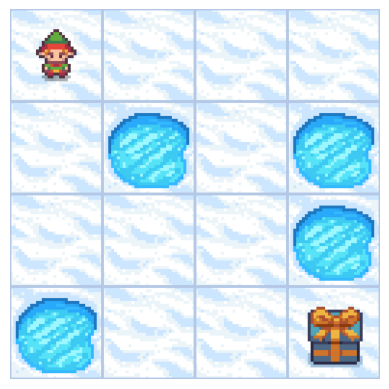

In [ ]:
state, info = env.reset()
print(f'Starting State: {state}')
plt.imshow(env.render())
plt.axis('off')
plt.show()

## 1.B - Evaluate Random Agent

Complete the following steps in the cell below:
1. Create an instance of `RandomAgent` for the environment created in Step 1.A.
2. Evaluate the random agent's performance using the `evaluate()` function. Use 1000 epsides for evaluation, with `gamma=1.0`. Set `seed=1` and `check_success=True`.



In [ ]:
random_agent = RandomAgent(env)

eval_results = evaluate(env, random_agent, episodes=1000, gamma=1.0, seed=1,check_success=True)

Mean Return:    0.007
StdDev Return:  0.0834
Mean Length:    7.715
StdDev Length:  5.7834
Success Rate:   0.007


## 1.C - Create Policy

You will now attempt to find an effective (though not necessarily optimal) policy for this Frozen Lake environment. **Your goal will be to find a policy that leads to a success rate of at least 0.7.**

Define your policy by completing the dictionary below, specifying an action (0, 1, 2, or 3) to be taken from each of the 16 states. Note that the action taken from a state representing a hole or the goal is unimportant, since actions will never be taken from these states.

After defining your policy, display it by passing it to the `display_policy()` method of the environment.

In [ ]:
my_policy = {
    0:1, 1:2, 2:1, 3:0,
    4:1, 5:0, 6:1, 7:0,
    8:2, 9:1, 10:1, 11:0,
    12:0, 13:2, 14:2, 15:0
}
env.display_policy(my_policy)

+---+---+---+---+
| S | → | ↓ | ← |
+---+---+---+---+
| ↓ | H | ↓ | H |
+---+---+---+---+
| → | ↓ | ↓ | H |
+---+---+---+---+
| H | → | → | G |
+---+---+---+---+



## 1.D - Evaluate Custom Policy

Complete the following steps in the cell below:
1. Create an instance of `DictAgent` for the environment created in Step 1.A and using your custom policy.
2. Evaluate the agent's performance using the `evaluate()` function. Use 1000 epsides for evaluation, with `gamma=1.0`. Set `seed=1` and `check_success=True`.


**Note: If your agent's success rate is not at least 0.7, then update your policy in Step 1.C and try again.**


In [ ]:
agent = DictAgent(env, my_policy)
evals_results = evaluate(env, agent, gamma=1.0, episodes=1000, check_success=True, seed=1)

Mean Return:    65.207
StdDev Return:  46.9949
Mean Length:    6.423
StdDev Length:  2.5495
Success Rate:   0.733


## 1.E - Animate Episodes

Use the following two cells to create two gifs demonstrating your agent's behavior. The gifs should be saved to a folder named `'gifs'` and should themselves be named `'frozen_lake_01'` and `'frozen_lake_02'`. Select two different seeds for the episodes shown in the gifs. The first gif should demonstrate a successful attempt and the second gif should demonstrate a failed attempt.

18 steps completed.
Success


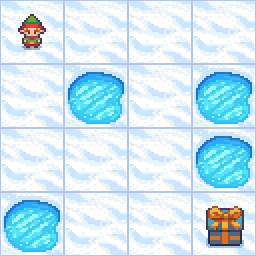

In [ ]:
create_gif(env, random_agent, folder='gifs', filename='frozen_lake_01', seed=3)

16 steps completed.
Failed


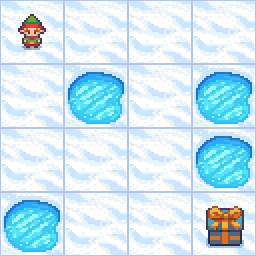

In [ ]:
create_gif(env, random_agent, folder='gifs', filename='frozen_lake_02', seed=18)

# Part 2 - Taxi Environment

In Part 2 of this assignment, you will explore the Taxi environment. You will be asked to find a solution to one instance of the environment and also to explore the performance of an agent that acts randomly.

## 2.A - Create Environment

In the cell below, create an instance of the `'Taxi-v3'`. Reset the environment, setting `seed=15`. Then use `matplotlib` to display the environment (without axes).

In [ ]:
env2 = gym.make('Taxi-v3', render_mode='rgb_array')

Starting State: 344


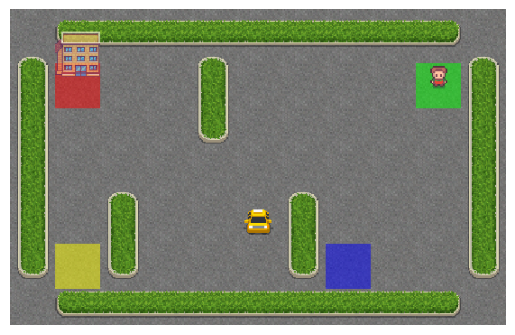

In [ ]:
state2, info = env2.reset(seed=15)
print(f'Starting State: {state2}')
plt.imshow(env2.render())
plt.axis('off')
plt.show()

## 2.B - Find Solution

You will now attempt to find a solution to the version of the environment assocated with a seed of 15, as displayed in Step 2.A. To create your solution, complete the steps below:

1. Create a list containing a sequence of integers, with each integer selected from the range 0 - 5 (inclusive). This list will represent a sequence of actions to be taken in your solution. You might wish to build this list step by step as your develop your solution.

2. Reset the environment.

3. Loop over the list of actions. With each iteration of the loop, apply the appropriate action and then print a message as shown below, with the blanks replaced with the approprate values. Use f-strings to align the components of the output.

    * `Action taken: ____, New state: ____, Reward: ____, Done: ____`

4. Use matplotlib to display the final state of your environment (without axes).

Actions:

    0:South, 1:North, 2:East, 3:West, 4:Pick up, 5: Drop Off

Old State: 344, Action:  1, New State: 244, Reward: -1, Done: False
Old State: 344, Action:  1, New State: 144, Reward: -1, Done: False
Old State: 344, Action:  2, New State: 164, Reward: -1, Done: False
Old State: 344, Action:  2, New State: 184, Reward: -1, Done: False
Old State: 344, Action:  1, New State:  84, Reward: -1, Done: False
Old State: 344, Action:  4, New State:  96, Reward: -1, Done: False
Old State: 344, Action:  2, New State:  96, Reward: -1, Done: False
Old State: 344, Action:  3, New State:  76, Reward: -1, Done: False
Old State: 344, Action:  0, New State: 176, Reward: -1, Done: False
Old State: 344, Action:  3, New State: 156, Reward: -1, Done: False
Old State: 344, Action:  0, New State: 256, Reward: -1, Done: False
Old State: 344, Action:  3, New State: 236, Reward: -1, Done: False
Old State: 344, Action:  1, New State: 136, Reward: -1, Done: False
Old State: 344, Action:  3, New State: 116, Reward: -1, Done: False
Old State: 344, Action:  1, New State:  16, Rewa

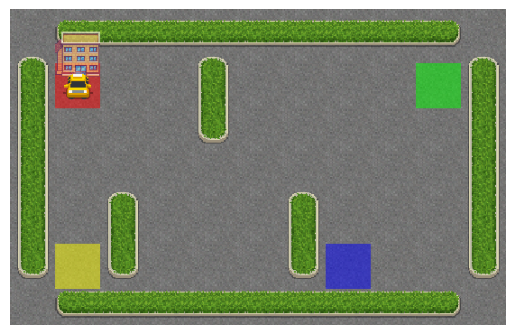

In [ ]:
actions = [1, 1, 2, 2, 1,4,2,3,0,3,0,3,1,3,1,5]

state2, info = env2.reset(seed=15)

for a in actions:
    old_state = state2
    state, reward, done, truncated, info = env2.step(a)

    print(f'Old State: {old_state:>3}, Action: {a:>2}, New State: {state:>3}, Reward: {reward:>2}, Done: {done}')
plt.imshow(env2.render())
plt.axis('off')
plt.show()

## 2.C - Animate Solution

Run the cell below as-is to animate your proposed solution.

16 steps completed.
Success


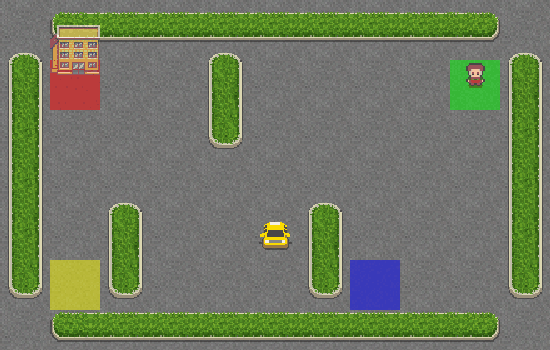

In [ ]:
create_gif(env2, agent=None, actions=actions, seed=15, folder='gifs', filename='taxi_soln')

## 2.D - Evaluate Random Agent

In theory, an agent acting randomly in the Taxi environment will eventually find a solution, but it might take an exceptionally long time for it to do so. We will explore this fact in this step.

Perform the following steps in the cell below:
1. Create an instance of `RandomAgent` for the environment created in Step 2.A.
2. Evaluate the random agent's performance using the `evaluate()` function. Use 500 episodes for evaluation, with `gamma=1.0`. Set `seed=1` and `max_steps=None`.



In [ ]:
random_agent2 = RandomAgent(env2)

val_results2 = evaluate(env2, random_agent2, gamma=1.0, episodes=500, max_steps=None, seed=1, check_success=True)

Mean Return:    -9570.648
StdDev Return:  9190.9206
Mean Length:    2449.176
StdDev Length:  2339.1332
Success Rate:   1.0


# Part 3 - Cart Pole

In Part 3 of this assignment, you will explore the Cart Pole environment. You will be asked to define and evaluate two policies for this environment. Since this environmnet has a continuous state space, we cannot represent policies for the environment as a dictionary. We will instead use functions to represent policies.

## 3.A - Create Environment

In the cell below, create an instance of the 'CartPole-v1'. Reset the environment setting `seed=42` and print the initial state. Then use matplotlib to display the environment (without axes).

In [ ]:
env3 = gym.make('CartPole-v1', render_mode='rgb_array')

Starting State: [ 0.0273956  -0.00611216  0.03585979  0.0197368 ]


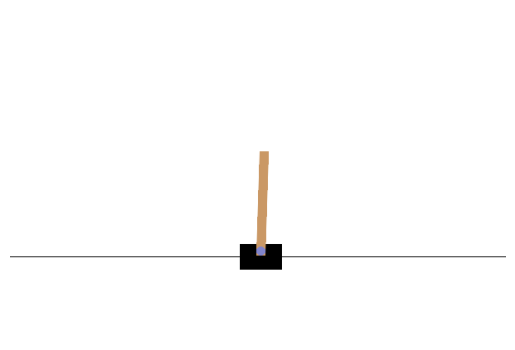

In [ ]:
state3, info = env3.reset(seed=42)
print(f'Starting State: {state3}')
plt.imshow(env3.render())
plt.axis('off')
plt.show()

## 3.B - Performance of Random Agent

Create an instance of `RandomAgent` for the environment created in Step 3.A. Then use `evaluate()` to evaluate the random agent, using 1000 episodes and setting `gamma=1.0` and `seed=1`. Then display the mean episode length by displaying a message formatted as shown below.

`Mean episode length when acting randomly: ____`


In [ ]:
random_agent3 = RandomAgent(env3)

eval_results3 = evaluate(env3, random_agent3, gamma=1.0, episodes=1000, seed=1)


Mean Return:    46.891
StdDev Return:  15.0174
Mean Length:    47.891
StdDev Length:  15.0174


## 3.C - Episode Generated by Random Agent

Use `create_gif()` to animate an episode generated by the random agent. Set `seed=1` and name the gif `cartpole_1`.


70 steps completed.


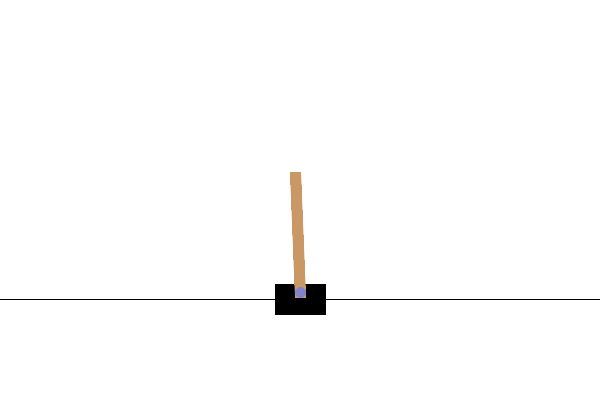

In [ ]:
create_gif(env3, random_agent3, seed=1, folder='gifs', filename='cartpole_1')

## 3.D - Performance Under Policy A

We will now create and evaluate a very basic policy. This policy will simply move left if the pole is leaning to the left and will move right if the pole is leaning to the right. Recall that the angle of pole is stored in the 3rd element of the state array (that is, the element at index 2). If the angle is negative, then the pole is leaning to the left, and if the angle is positive, then the pole is leaning to the right.

Start by completing the function `policy_a()`. This function should return an action of 0 or 1 based on the current angle of the pole, as described in the paragraph above.

After completing the function, fill in the blanks in the cell to evaluate the performance of an `FnAgent` agent following the policy defined by the function `policy_a()`. Display the mean length of the episodes generated by this agent.


In [ ]:
def policy_a(state):

    if state[2] < 0: return 0
    if state[2] > 0: return 1


    # Complete the function
random_agent3= FnAgent(policy_a)
results = evaluate(env3, random_agent3, gamma=1.0, episodes=1000, seed=1)

Mean Return:    158.312
StdDev Return:  28.1448
Mean Length:    159.312
StdDev Length:  28.1448


## 3.E - Episode Generated by Policy A

Use `create_gif()` to animate an episode generated by the agent following Policy A. Set `seed=1` and name the gif `cartpole_2`.


124 steps completed.


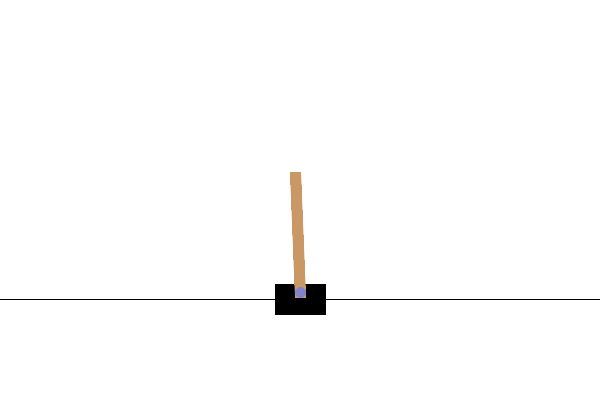

In [ ]:
create_gif(env3, random_agent3,seed=1, folder='gifs', filename='cartpole_2')

## 3.F - Performance Under Policy B

We will now create and evaluate a more complicated policy. Under this policy, the agent will move in the direction the pole is leaning if the angle is sufficiently large. If the angle of the pole is small, then the agent will move opposite the direction in which the pole is currently swinging toward. The decision between te two behaviors will be determined by a threshold value `K`.


After completing the function, fill in the blanks in the cell to evaluate the performance of an `FnAgent` agent following the policy defined by the function `policy_b()`. Display the mean length of the episodes generated by this agent.

**Adjust the threshold value `K` until the mean episode length is greater than 900.**

In [ ]:
def policy_b(state):
    K = 0.03
    if state[2] < -K: return 0
    if state[2] > K: return 1
    if state[3] > 0: return 1
    if state[3] <= 0: return 0

random_agent3 = FnAgent(policy_b)

results = evaluate(env3, random_agent3, gamma=1.0, max_steps=1000, episodes=100, seed=1)

Mean Return:    991.85
StdDev Return:  57.0553
Mean Length:    991.87
StdDev Length:  56.9153


## 3.G - Episode Generated by Policy B

Use `create_gif()` to animate an episode generated by the agent following Policy B. Set `seed=1` and name the gif `cartpole_3`.


1000 steps completed.


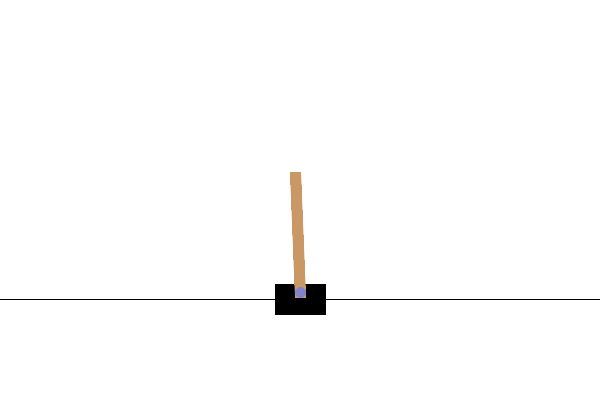

In [ ]:
create_gif(env3, random_agent3,seed=1, folder='gifs', filename='cartpole_3')